In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
base_folder_path = r'E:\Fault-Diagnosis-of-AUV\Dataset\Dataset' 

In [15]:
dataset_types = ['train', 'test']
fault_types = {
    'AddWeight': 'load_increase',
    'Normal': 'normal_state',
    'PressureGain_constant': 'depth_sensor_failure',
    'PropellerDamage_bad': 'severe_propeller_damage',
    'PropellerDamage_slight': 'slight_propeller_damage'
}

In [16]:
import os
combined_data = {'train': [], 'test': []}

for dataset_type in dataset_types:
    dataset_path = os.path.join(base_folder_path, dataset_type)
    for fault_folder, fault_label in fault_types.items():
        fault_path = os.path.join(dataset_path, fault_folder)
        if os.path.exists(fault_path):
            for file_name in os.listdir(fault_path):
                if file_name.endswith('.csv'):
                    file_path = os.path.join(fault_path, file_name)
                    try:
                        df = pd.read_csv(file_path)
                        df['Fault_Type'] = fault_label
                        df['Dataset_Type'] = dataset_type
                        combined_data[dataset_type].append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

# Combine all DataFrames into a single DataFrame for each dataset type
train_df = pd.concat(combined_data['train'], ignore_index=True) if combined_data['train'] else pd.DataFrame()
test_df = pd.concat(combined_data['test'], ignore_index=True) if combined_data['test'] else pd.DataFrame()

# Display the first few rows of the combined DataFrames
print("Training Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())


Training Data:
     time  pwm1  pwm2  pwm3  pwm4  depth  press  voltage  roll  pitch    yaw  \
0  202409  1100  1100  1100  1100  -0.02    592    12.08  5.97  -0.06  37.16   
1  202409  1100  1100  1100  1100  -0.01    593    12.08  6.05  -0.19  37.16   
2  202409  1100  1100  1100  1100   0.00    594    12.06  6.12  -0.34  37.17   
3  202409  1183  1183  1183  1183   0.01    595    12.05  6.18  -0.51  37.17   
4  202409  1183  1183  1183  1183   0.01    595    11.97  6.21  -0.66  37.17   

    a_x   a_y   a_z  w_row  w_pitch  w_yaw     Fault_Type Dataset_Type  
0 -0.02  0.90  8.76    1.6     -2.1    0.3  load_increase        train  
1  0.13  0.95  8.56    1.5     -3.0    0.4  load_increase        train  
2  0.07  0.88  8.64    1.3     -3.4    0.2  load_increase        train  
3  0.09  0.96  8.80    0.6     -3.3    0.3  load_increase        train  
4  0.07  1.00  8.61    0.2     -2.7    0.1  load_increase        train  

Test Data:
     time  pwm1  pwm2  pwm3  pwm4  depth  press  volta

In [17]:
# combine train and test datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)


In [18]:
combined_df.shape

(240823, 19)

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240823 entries, 0 to 240822
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          240823 non-null  int64  
 1   pwm1          240823 non-null  int64  
 2   pwm2          240823 non-null  int64  
 3   pwm3          240823 non-null  int64  
 4   pwm4          240823 non-null  int64  
 5   depth         240823 non-null  float64
 6   press         240823 non-null  int64  
 7   voltage       240823 non-null  float64
 8   roll          240823 non-null  float64
 9   pitch         240823 non-null  float64
 10  yaw           240823 non-null  float64
 11  a_x           240823 non-null  float64
 12  a_y           240823 non-null  float64
 13  a_z           240823 non-null  float64
 14  w_row         240823 non-null  float64
 15  w_pitch       240823 non-null  float64
 16  w_yaw         240823 non-null  float64
 17  Fault_Type    240823 non-null  object 
 18  Data

In [20]:
combined_df.dtypes

time              int64
pwm1              int64
pwm2              int64
pwm3              int64
pwm4              int64
depth           float64
press             int64
voltage         float64
roll            float64
pitch           float64
yaw             float64
a_x             float64
a_y             float64
a_z             float64
w_row           float64
w_pitch         float64
w_yaw           float64
Fault_Type       object
Dataset_Type     object
dtype: object

In [21]:
print(combined_df)


          time  pwm1  pwm2  pwm3  pwm4  depth  press  voltage  roll  pitch  \
0       202409  1100  1100  1100  1100  -0.02    592    12.08  5.97  -0.06   
1       202409  1100  1100  1100  1100  -0.01    593    12.08  6.05  -0.19   
2       202409  1100  1100  1100  1100   0.00    594    12.06  6.12  -0.34   
3       202409  1183  1183  1183  1183   0.01    595    12.05  6.18  -0.51   
4       202409  1183  1183  1183  1183   0.01    595    11.97  6.21  -0.66   
...        ...   ...   ...   ...   ...    ...    ...      ...   ...    ...   
240818  203712  1200  1200  1200  1200   0.30    642    11.92  3.86  -2.52   
240819  203713  1200  1200  1200  1200   0.33    645    11.90  3.86  -3.07   
240820  203713  1200  1200  1200  1200   0.32    644    11.91  4.04  -3.16   
240821  203713  1200  1200  1200  1200   0.26    638    11.92  4.31  -2.82   
240822  203713  1200  1200  1200  1200   0.28    640    11.91  4.26  -2.41   

          yaw   a_x   a_y    a_z  w_row  w_pitch  w_yaw  \
0   

In [22]:
print(combined_df.columns)


Index(['time', 'pwm1', 'pwm2', 'pwm3', 'pwm4', 'depth', 'press', 'voltage',
       'roll', 'pitch', 'yaw', 'a_x', 'a_y', 'a_z', 'w_row', 'w_pitch',
       'w_yaw', 'Fault_Type', 'Dataset_Type'],
      dtype='object')


In [23]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,240823.0,184581.404276,27724.084870,20128.00,160457.000,195405.00,204539.00,221252.00
pwm1,240823.0,1194.819390,13.624453,1000.00,1195.000,1199.00,1201.00,1238.00
pwm2,240823.0,1194.819390,13.624453,1000.00,1195.000,1199.00,1201.00,1238.00
pwm3,240823.0,1194.819390,13.624453,1000.00,1195.000,1199.00,1201.00,1238.00
pwm4,240823.0,1194.819390,13.624453,1000.00,1195.000,1199.00,1201.00,1238.00
depth,240823.0,0.399702,0.168941,-0.12,0.290,0.42,0.51,1.62
press,240823.0,645.970414,18.347039,584.00,635.000,647.00,658.00,774.00
voltage,240823.0,11.954426,0.130892,11.42,11.870,11.96,12.05,12.43
roll,240823.0,3.406551,2.287772,-16.08,2.030,3.21,4.57,28.72
pitch,240823.0,0.766470,2.662267,-17.21,-0.870,0.97,2.54,20.00


In [24]:
# Select only the numerical columns for correlation calculation
num_columns = ['time', 'pwm1', 'pwm2', 'pwm3', 'pwm4', 'depth', 'press', 'voltage',
                     'roll', 'pitch', 'yaw', 'a_x', 'a_y', 'a_z', 'w_row', 'w_pitch', 'w_yaw']
correlation_matrix = combined_df[num_columns].corr()

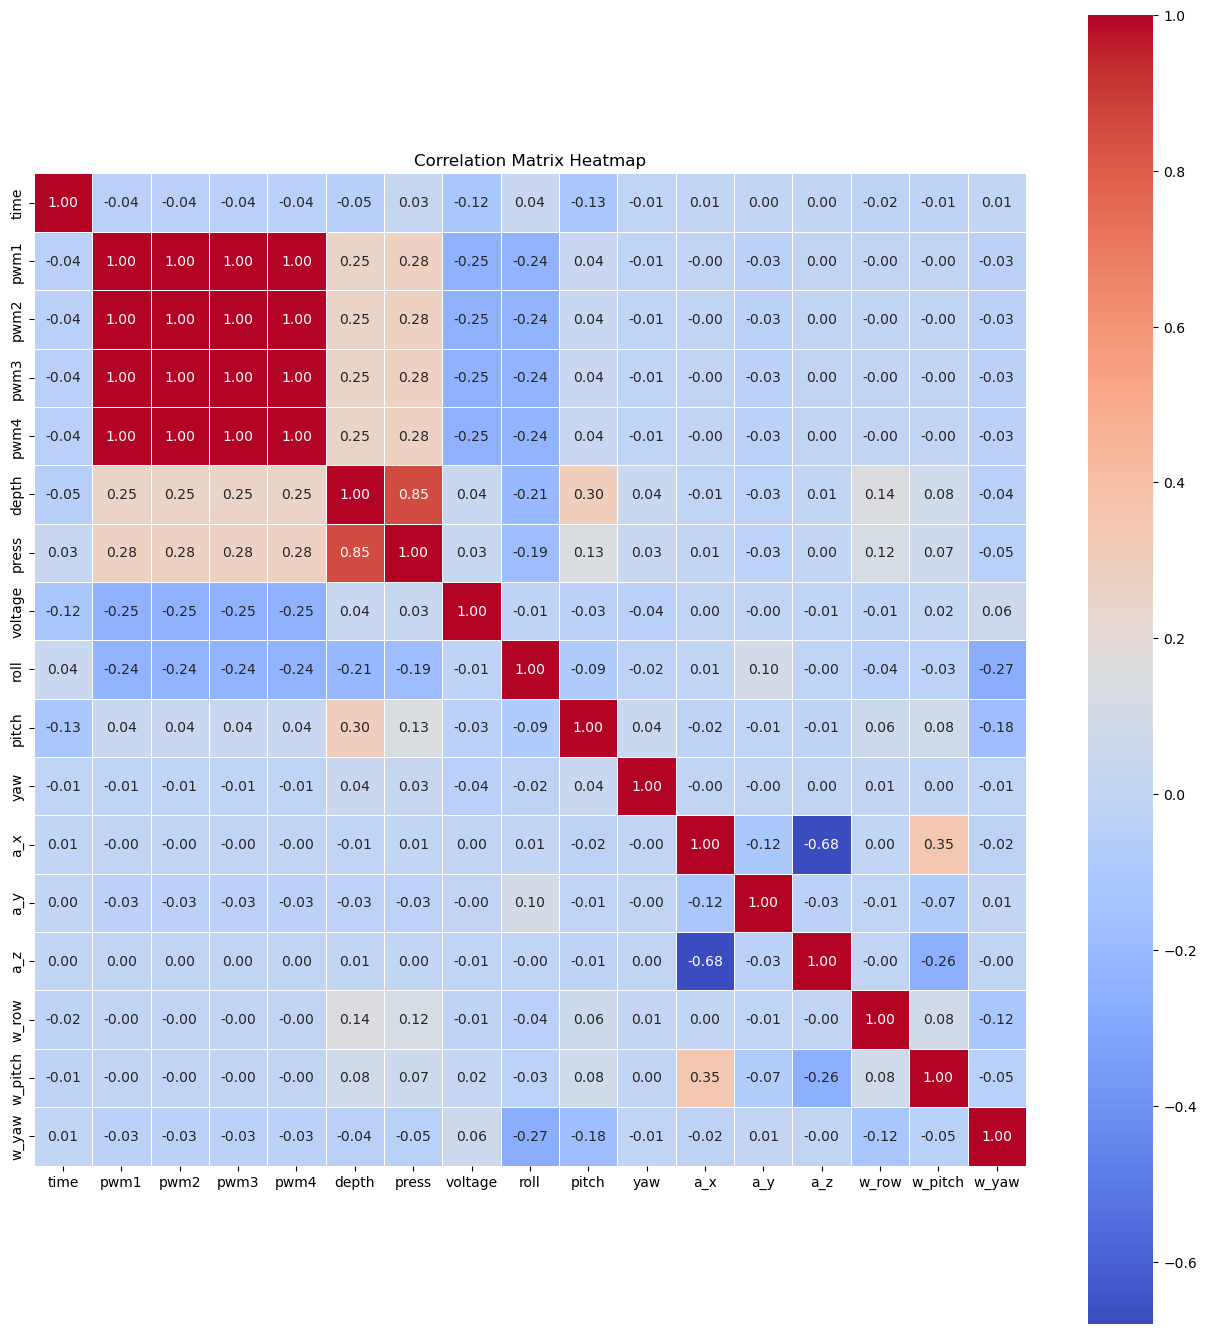

In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 17))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [26]:
combined_df["Fault_Type"].unique()

array(['load_increase', 'normal_state', 'depth_sensor_failure',
       'severe_propeller_damage', 'slight_propeller_damage'], dtype=object)

In [27]:
combined_df["Fault_Type"].value_counts()

Fault_Type
load_increase              52509
depth_sensor_failure       52146
slight_propeller_damage    50937
severe_propeller_damage    48778
normal_state               36453
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

In [30]:
print(label_encoder)

LabelEncoder()


In [31]:
combined_df["Fault_Type"] = label_encoder.fit_transform(combined_df["Fault_Type"])

In [32]:
combined_df.head()

,time,pwm1,pwm2,pwm3,pwm4,depth,press,voltage,roll,pitch,yaw,a_x,a_y,a_z,w_row,w_pitch,w_yaw,Fault_Type,Dataset_Type
0,202409,1100,1100,1100,1100,-0.02,592,12.08,5.97,-0.06,37.16,-0.02,0.90,8.76,1.6,-2.1,0.3,1,train
1,202409,1100,1100,1100,1100,-0.01,593,12.08,6.05,-0.19,37.16,0.13,0.95,8.56,1.5,-3.0,0.4,1,train
2,202409,1100,1100,1100,1100,0.00,594,12.06,6.12,-0.34,37.17,0.07,0.88,8.64,1.3,-3.4,0.2,1,train
3,202409,1183,1183,1183,1183,0.01,595,12.05,6.18,-0.51,37.17,0.09,0.96,8.80,0.6,-3.3,0.3,1,train
4,202409,1183,1183,1183,1183,0.01,595,11.97,6.21,-0.66,37.17,0.07,1.00,8.61,0.2,-2.7,0.1,1,train


In [33]:
# Display statistical summary of the DataFrame
print(combined_df.describe())


                time           pwm1           pwm2           pwm3  \
count  240823.000000  240823.000000  240823.000000  240823.000000   
mean   184581.404276    1194.819390    1194.819390    1194.819390   
std     27724.084870      13.624453      13.624453      13.624453   
min     20128.000000    1000.000000    1000.000000    1000.000000   
25%    160457.000000    1195.000000    1195.000000    1195.000000   
50%    195405.000000    1199.000000    1199.000000    1199.000000   
75%    204539.000000    1201.000000    1201.000000    1201.000000   
max    221252.000000    1238.000000    1238.000000    1238.000000   

                pwm4          depth          press        voltage  \
count  240823.000000  240823.000000  240823.000000  240823.000000   
mean     1194.819390       0.399702     645.970414      11.954426   
std        13.624453       0.168941      18.347039       0.130892   
min      1000.000000      -0.120000     584.000000      11.420000   
25%      1195.000000       0.2900

In [34]:
# Check for missing values
print(combined_df.isnull().sum())


time            0
pwm1            0
pwm2            0
pwm3            0
pwm4            0
depth           0
press           0
voltage         0
roll            0
pitch           0
yaw             0
a_x             0
a_y             0
a_z             0
w_row           0
w_pitch         0
w_yaw           0
Fault_Type      0
Dataset_Type    0
dtype: int64


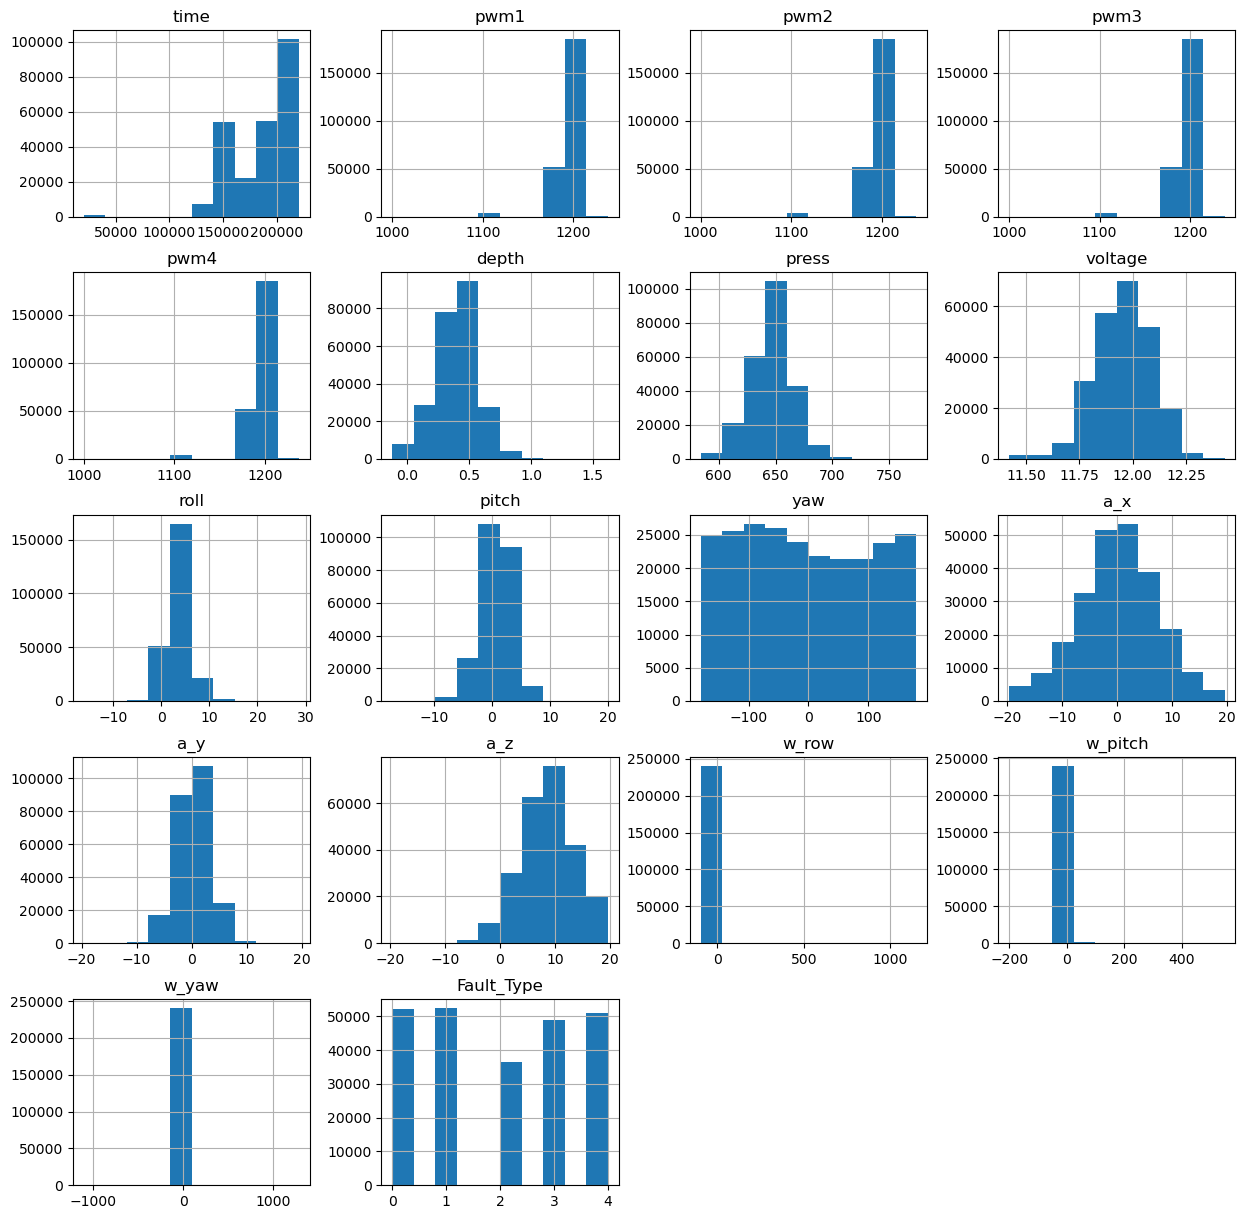

In [39]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
combined_df.hist(figsize=(15, 15))
plt.show()


In [31]:
combined_df["Fault_Type"].unique()

array([1, 2, 0, 3, 4])

In [32]:
combined_df["Fault_Type"].value_counts()

Fault_Type
1    52509
0    52146
4    50937
3    48778
2    36453
Name: count, dtype: int64

In [33]:
combined_df.head()

,time,pwm1,pwm2,pwm3,pwm4,depth,press,voltage,roll,pitch,yaw,a_x,a_y,a_z,w_row,w_pitch,w_yaw,Fault_Type,Dataset_Type
0,202409,1100,1100,1100,1100,-0.02,592,12.08,5.97,-0.06,37.16,-0.02,0.90,8.76,1.6,-2.1,0.3,1,train
1,202409,1100,1100,1100,1100,-0.01,593,12.08,6.05,-0.19,37.16,0.13,0.95,8.56,1.5,-3.0,0.4,1,train
2,202409,1100,1100,1100,1100,0.00,594,12.06,6.12,-0.34,37.17,0.07,0.88,8.64,1.3,-3.4,0.2,1,train
3,202409,1183,1183,1183,1183,0.01,595,12.05,6.18,-0.51,37.17,0.09,0.96,8.80,0.6,-3.3,0.3,1,train
4,202409,1183,1183,1183,1183,0.01,595,11.97,6.21,-0.66,37.17,0.07,1.00,8.61,0.2,-2.7,0.1,1,train


In [34]:
combined_df['label'] = combined_df['voltage'].apply(lambda x: "fault" if x > 12.06 else "normal")

# Display the first few rows with the new label
combined_df.head()

,time,pwm1,pwm2,pwm3,pwm4,depth,press,voltage,roll,pitch,yaw,a_x,a_y,a_z,w_row,w_pitch,w_yaw,Fault_Type,Dataset_Type,label
0,202409,1100,1100,1100,1100,-0.02,592,12.08,5.97,-0.06,37.16,-0.02,0.90,8.76,1.6,-2.1,0.3,1,train,fault
1,202409,1100,1100,1100,1100,-0.01,593,12.08,6.05,-0.19,37.16,0.13,0.95,8.56,1.5,-3.0,0.4,1,train,fault
2,202409,1100,1100,1100,1100,0.00,594,12.06,6.12,-0.34,37.17,0.07,0.88,8.64,1.3,-3.4,0.2,1,train,normal
3,202409,1183,1183,1183,1183,0.01,595,12.05,6.18,-0.51,37.17,0.09,0.96,8.80,0.6,-3.3,0.3,1,train,normal
4,202409,1183,1183,1183,1183,0.01,595,11.97,6.21,-0.66,37.17,0.07,1.00,8.61,0.2,-2.7,0.1,1,train,normal


In [ ]:
# Display the first few rows of the DataFrame
print(combined_df.head())



In [34]:
# Display the last few rows of the DataFrame
print(combined_df.tail())


          time  pwm1  pwm2  pwm3  pwm4  depth  press  voltage  roll  pitch  \
240818  203712  1200  1200  1200  1200   0.30    642    11.92  3.86  -2.52   
240819  203713  1200  1200  1200  1200   0.33    645    11.90  3.86  -3.07   
240820  203713  1200  1200  1200  1200   0.32    644    11.91  4.04  -3.16   
240821  203713  1200  1200  1200  1200   0.26    638    11.92  4.31  -2.82   
240822  203713  1200  1200  1200  1200   0.28    640    11.91  4.26  -2.41   

          yaw   a_x   a_y    a_z  w_row  w_pitch  w_yaw  Fault_Type  \
240818  70.15  2.66 -3.99   7.78    0.6     -4.2   -6.0           4   
240819  69.87  2.56 -1.29   5.16   -1.5     -1.8   -6.0           4   
240820  69.56 -3.42  0.39  11.60   -1.2      2.6   -6.8           4   
240821  69.22  7.31  0.80   6.56   -0.5     -0.4   -6.7           4   
240822  68.81 -0.24  0.62  12.38   -0.5     -2.4   -7.8           4   

       Dataset_Type   label  
240818         test  normal  
240819         test  normal  
240820        

In [35]:
# Display basic information about the DataFrame
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240823 entries, 0 to 240822
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          240823 non-null  int64  
 1   pwm1          240823 non-null  int64  
 2   pwm2          240823 non-null  int64  
 3   pwm3          240823 non-null  int64  
 4   pwm4          240823 non-null  int64  
 5   depth         240823 non-null  float64
 6   press         240823 non-null  int64  
 7   voltage       240823 non-null  float64
 8   roll          240823 non-null  float64
 9   pitch         240823 non-null  float64
 10  yaw           240823 non-null  float64
 11  a_x           240823 non-null  float64
 12  a_y           240823 non-null  float64
 13  a_z           240823 non-null  float64
 14  w_row         240823 non-null  float64
 15  w_pitch       240823 non-null  float64
 16  w_yaw         240823 non-null  float64
 17  Fault_Type    240823 non-null  int32  
 18  Data

In [42]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df.drop(columns=['label']))

# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, index=combined_df.index, columns=combined_df.columns[:-1])
scaled_df['label'] = combined_df['label']


KeyError: "['label'] not found in axis"

In [1]:
import pandas as pd
import os

# Define the path to the folder containing the datasets
folder_path = r'E:\Fault-Diagnosis-of-AUV\Dataset\Dataset'   # Update this path to your folder

# Define the labeling function based on specific criteria
def label_data(row):
    if row['voltage'] < 12.0:  # Update this condition as needed
        return 'fault'
    else:
        return 'normal'

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # Load the dataset
            data = pd.read_csv(file_path)
            
            # Check if 'voltage' column exists
            if 'voltage' not in data.columns:
                print(f"Skipping {filename}: 'voltage' column not found")
                continue
            
            # Apply the labeling function to each row in the dataset
            data['label'] = data.apply(label_data, axis=1)
            
            # Print the labeled data
            print(f"Labeled data for {filename}:")
            print(data.head())  # Adjust the number of rows to print as needed
            
            # Define the path to save the labeled dataset
            labeled_file_path = os.path.join(folder_path, f'labeled_{filename}')
            
            # Save the labeled dataset to a new CSV file
            data.to_csv(labeled_file_path, index=False)
            
            print(f"Labeled dataset saved to: {labeled_file_path}")
        
        except Exception as e:
            print(f"Error processing {filename}: {e}")


In [4]:
def label_data(row):
    if row['voltage'] < 12.0:  # Update this condition as needed
        return 'fault'
    else:
        return 'normal'

# Loop through each file in the folder for labeling
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        try:
            # Load the dataset
            data = pd.read_csv(file_path)
            
            # Check if 'voltage' column exists
            if 'voltage' not in data.columns:
                print(f"Skipping {filename}: 'voltage' column not found")
                continue
            
            # Apply the labeling function to each row in the dataset
            data['label'] = data.apply(label_data, axis=1)
            
            # Print the labeled data
            print(f"Labeled data for {filename}:")
            print(data.head())  # Adjust the number of rows to print as needed
            
            # Define the path to save the labeled dataset
            labeled_file_path = os.path.join(folder_path, f'labeled_{filename}')
            
            # Save the labeled dataset to a new CSV file
            data.to_csv(labeled_file_path, index=False)
            
            print(f"Labeled dataset saved to: {labeled_file_path}")
        
        except Exception as e:
            print(f"Error processing {filename}: {e}")

In [2]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the path where your datasets are stored
input_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset'
output_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset\\cleaned_labeled_train'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all CSV files in the input folder
file_list = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Function to clean and label a dataset
def clean_and_label_dataset(file_path):
    df = pd.read_csv(file_path)

    # Handle missing values (example: fill with mean)
    df.fillna(df.mean(), inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Convert data types if necessary
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'], errors='coerce')

    # Handle outliers (example: capping values to 1.5*IQR)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Normalize/scale data if needed (example: standard scaling)
    scaler = StandardScaler()
    df[df.columns.difference(['time', 'label'])] = scaler.fit_transform(df[df.columns.difference(['time', 'label'])])

    # Add a label column based on depth
    df['label'] = df['depth'].apply(lambda x: 1 if x > 0.05 else 0)

    return df

In [7]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the path where your datasets are stored
input_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset'
output_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset\\cleaned_labeled_train'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all CSV files in the input folder
file_list = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Function to clean and label a dataset
def clean_labeled_train(file_path):
    df = pd.read_csv(file_path)
    print(f"Processing file: {file_path}")

    # Handle missing values (example: fill with mean)
    df.fillna(df.mean(), inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Convert data types if necessary
    if not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'], errors='coerce')

    # Handle outliers (example: capping values to 1.5*IQR)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Normalize/scale data if needed (example: standard scaling)
    scaler = StandardScaler()
    columns_to_scale = df.columns.difference(['time', 'label'])
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Add a label column based on depth
    df['label'] = df['depth'].apply(lambda x: 1 if x > 0.05 else 0)

    return df

# Process each file in the input folder
for file_name in file_list:
    file_path = os.path.join(input_folder, file_name)
    cleaned_df = clean_labeled_train(file_path)
    
    # Save the cleaned and labeled dataframe to the output folder
    output_file_path = os.path.join(output_folder, file_name)
    cleaned_df.to_csv(output_file_path, index=False)
    print(f"Saved cleaned data to: {output_file_path}")

print("Processing complete.")


Processing complete.


In [8]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the path where your datasets are stored
input_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset'
output_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset\\cleaned_labeled_train'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all CSV files in the input folder
file_list = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Function to clean and label a dataset
def clean_and_label_dataset(file_path):
    print(f"Processing file: {file_path}")
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

    if df.empty:
        print(f"File {file_path} is empty. Skipping.")
        return None

    print("Initial data:")
    print(df.head())

    # Handle missing values (example: fill with mean)
    df.fillna(df.mean(), inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Convert data types if necessary
    if 'time' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'], errors='coerce')

    print("Data after handling missing values and duplicates:")
    print(df.head())

    # Handle outliers (example: capping values to 1.5*IQR)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    print("Data after handling outliers:")
    print(df.head())

    # Normalize/scale data if needed (example: standard scaling)
    scaler = StandardScaler()
    columns_to_scale = df.columns.difference(['time', 'label'])
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    print("Data after scaling:")
    print(df.head())

    # Add a label column based on depth
    if 'depth' in df.columns:
        df['label'] = df['depth'].apply(lambda x: 1 if x > 0.05 else 0)
    else:
        print("Depth column not found. Skipping labeling.")
        return None

    print("Data after adding label column:")
    print(df.head())

    return df

# Process each file in the input folder
for file_name in file_list:
    file_path = os.path.join(input_folder, file_name)
    cleaned_df = clean_and_label_dataset(file_path)
    
    if cleaned_df is not None:
        # Save the cleaned and labeled dataframe to the output folder
        output_file_path = os.path.join(output_folder, file_name)
        try:
            cleaned_df.to_csv(output_file_path, index=False)
            print(f"Saved cleaned data to: {output_file_path}")
        except Exception as e:
            print(f"Error saving file {output_file_path}: {e}")
    else:
        print(f"Skipping file: {file_path}")

print("Processing complete.")


Processing complete.


In [10]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Function to clean and label a dataset
def clean_and_label_dataset(df):
    # Handle missing values (example: fill with mean)
    df.fillna(df.mean(), inplace=True)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Convert data types if necessary
    if 'time' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'], errors='coerce')

    # Handle outliers (example: capping values to 1.5*IQR)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Normalize/scale data if needed (example: standard scaling)
    scaler = StandardScaler()
    columns_to_scale = df.columns.difference(['time', 'label'])
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    # Add a label column based on depth
    if 'depth' in df.columns:
        df['label'] = df['depth'].apply(lambda x: 1 if x > 0.05 else 0)
    else:
        print("Depth column not found. Skipping labeling.")
        return None

    return df

# Define the path where your datasets are stored
input_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset'
output_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset\\cleaned_labeled_train'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all CSV files in the input folder
file_list = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Process each file in the input folder
all_data = pd.DataFrame()
for file_name in file_list:
    file_path = os.path.join(input_folder, file_name)
    print(f"Processing file: {file_path}")
    try:
        df = pd.read_csv(file_path)
        cleaned_df = clean_and_label_dataset(df)
        if cleaned_df is not None:
            output_file_path = os.path.join(output_folder, file_name)
            cleaned_df.to_csv(output_file_path, index=False)
            print(f"Saved cleaned data to: {output_file_path}")
            all_data = pd.concat([all_data, cleaned_df], ignore_index=True)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print("Processing complete.")

# Display the cleaned and labeled dataset
if not all_data.empty:
    display(all_data.head())

    # Calculate the correlation matrix
    correlation_matrix = all_data.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(16, 17))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

    # Set the title for the heatmap
    plt.title('Correlation Matrix Heatmap')

    # Show the plot
    plt.show()
else:
    print("No data available to plot.")


Processing complete.
No data available to plot.


In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path where your datasets are stored
input_folder = 'E:\\Fault-Diagnosis-of-AUV\\Dataset\\Dataset'

# List all CSV files in the input folder
file_list = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

# Function to label a dataset based on depth
def label_dataset(file_path):
    try:
        df = pd.read_csv(file_path)
        # Add a label column based on depth
        if 'depth' in df.columns:
            df['label'] = df['depth'].apply(lambda x: 1 if x > 0.05 else 0)
            return df
        else:
            print(f"Depth column not found in file {file_path}. Skipping labeling.")
            return None
    except Exception as e:
        print(f"Error reading or labeling file {file_path}: {e}")
        return None

# Process each file in the input folder
all_data = pd.DataFrame()
for file_name in file_list:
    file_path = os.path.join(input_folder, file_name)
    print(f"Labeling dataset for file: {file_path}")
    labeled_df = label_dataset(file_path)
    if labeled_df is not None:
        all_data = pd.concat([all_data, labeled_df], ignore_index=True)

# Display the labeled dataset
if not all_data.empty:
    display(all_data.head())

    # Calculate the correlation matrix
    correlation_matrix = all_data.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(16, 17))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

    # Set the title for the heatmap
    plt.title('Correlation Matrix Heatmap')

    # Show the plot
    plt.show()
else:
    print("No data available to display.")



No data available to display.


In [3]:
combined_df['label'] = combined_df['voltage'].apply(lambda x: "fault" if x > 12.06 else "normal")

# Display the first few rows with the new label
combined_df.head()

NameError: name 'combined_df' is not defined

In [ ]:
!pip install tensorflow
